# Exploration

## Tips

Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


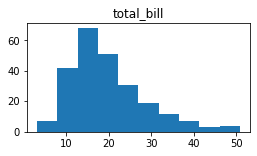

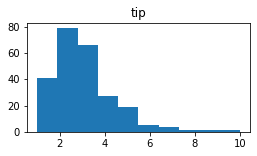

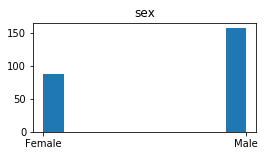

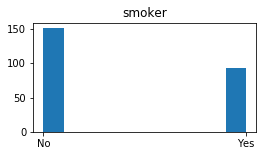

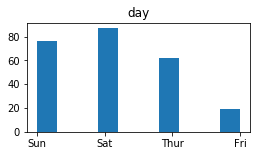

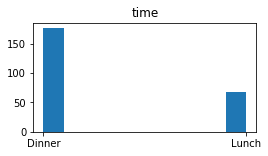

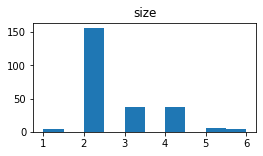

In [22]:
for col in df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

___

**Does tip amount differ across the time of day(Lunch or Dinner)?**

- $H_0$ = Tip amount does not differ between Lunch and Dinner
- $H_a$ = Tip amount does differ between Lunch and Dinner

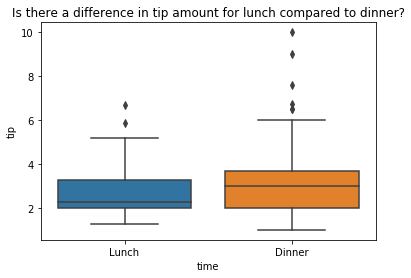

In [5]:
sns.boxplot(x = 'time', y = 'tip', data = df)
plt.title('Is there a difference in tip amount for lunch compared to dinner?')
plt.show()

In [14]:
lunch = df[df.time == 'Lunch']
dinner = df[df.time == 'Dinner']
stats.levene(lunch.tip, dinner.tip)

LeveneResult(statistic=0.88098601335503, pvalue=0.3488676006910484)

- Variance is equal

In [15]:
stats.ttest_ind(lunch.tip, dinner.tip, equal_var = True)

Ttest_indResult(statistic=-1.9062569301202392, pvalue=0.05780153475171558)

**Conclusion:** No, tips amount does not differ across time of day(Lunch or Dinner)
___

**Does being a smoker affect what time of day they go out to eat?**

- $H_0$ = Being a smoker does not affect the time of day one goes out to eat.
- $H_a$ = Being a smoker does affect the time of day one goes out to eat.

In [17]:
crosstab = pd.crosstab(df.smoker, df.time)
crosstab

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


In [19]:
chi2, p, degf, expected = stats.chi2_contingency(crosstab)

In [20]:
chi2, p

(0.5053733928754355, 0.4771485672079724)

**Conclusion:** No, being a smoker does not affect the what time of day they go out to eat.